In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download suvooo/hindi-character-recognition

 93% 71.0M/76.1M [00:00<00:00, 77.6MB/s]
100% 76.1M/76.1M [00:00<00:00, 85.1MB/s]


In [5]:
! unzip hindi-character-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenCharacterDataset/Train/digit_7/104021.png  
  inflating: Devanaga

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
import keras
import seaborn as sns
from keras.callbacks import ModelCheckpoint,  EarlyStopping
import pickle
from tensorflow.keras import datasets, layers, models
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from keras.layers import concatenate,add

In [7]:

im_size = (32,32)
batch_size = 32

train_data = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

train = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Train',
                    class_mode="categorical", color_mode="grayscale",
                    batch_size=32, target_size=(32, 32), shuffle = True, seed = 1011,
                    subset = 'training', interpolation="bilinear", follow_links=False)

Found 62560 images belonging to 46 classes.


In [8]:
validation_data = ImageDataGenerator(rescale=1./255,validation_split = 0.2,)

validation = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Train',
              class_mode="categorical", color_mode="grayscale",
              batch_size=32, target_size=(32, 32), shuffle = True, seed = 1010,
              subset = 'validation', interpolation="bilinear", follow_links=False)

Found 15640 images belonging to 46 classes.


In [9]:
test_data = ImageDataGenerator(rescale=1./255)

test = train_data.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Test',
                    class_mode="categorical", classes=None, color_mode="grayscale",
                    batch_size=32,target_size=(32, 32),shuffle = False, seed = None,
                    subset = None, interpolation="bilinear", follow_links=False)

Found 13800 images belonging to 46 classes.


In [10]:
model1 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 1)), 
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'), 
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.50),

    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.50),

    keras.layers.Conv2D(64, (3, 3), padding = 'same',activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.50),
    
])

In [11]:
model2 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 1)), 
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'),
    #keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'), 
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.55),

    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    #keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.55),

    keras.layers.Conv2D(64, (3, 3), padding = 'same',activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    #keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.55),
    
])

In [12]:
model3 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 1)), 
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'), 
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.25),

    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.25),

    keras.layers.Conv2D(64, (3, 3), padding = 'same',activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.25),
    
])

In [13]:
model4 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 1)), 
    keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'), 
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.35),

    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.Conv2D(32, (3, 3),padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.35),

    keras.layers.Conv2D(64, (3, 3), padding = 'same',activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    Dropout(rate=0.35),
    
])

In [14]:
inp_size = Input((32, 32,1))

out1 = model1(inp_size)    
out2 = model2(inp_size) 
out3 = model3(inp_size)
out4 = model4(inp_size)

ulti_model = concatenate([out1,out2,out3,out4])


In [15]:
ulti_model = Flatten()(ulti_model)
ulti_model = Dense(512, activation='relu')(ulti_model)
ulti_model = Dense(46, activation='softmax')(ulti_model)
final = Model(inp_size, ulti_model)


final.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
print(final.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 4, 4, 64)     71792       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 4, 4, 64)     71792       ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 4, 4, 64)     71792       ['input_1[0][0]']                
                                                                                              

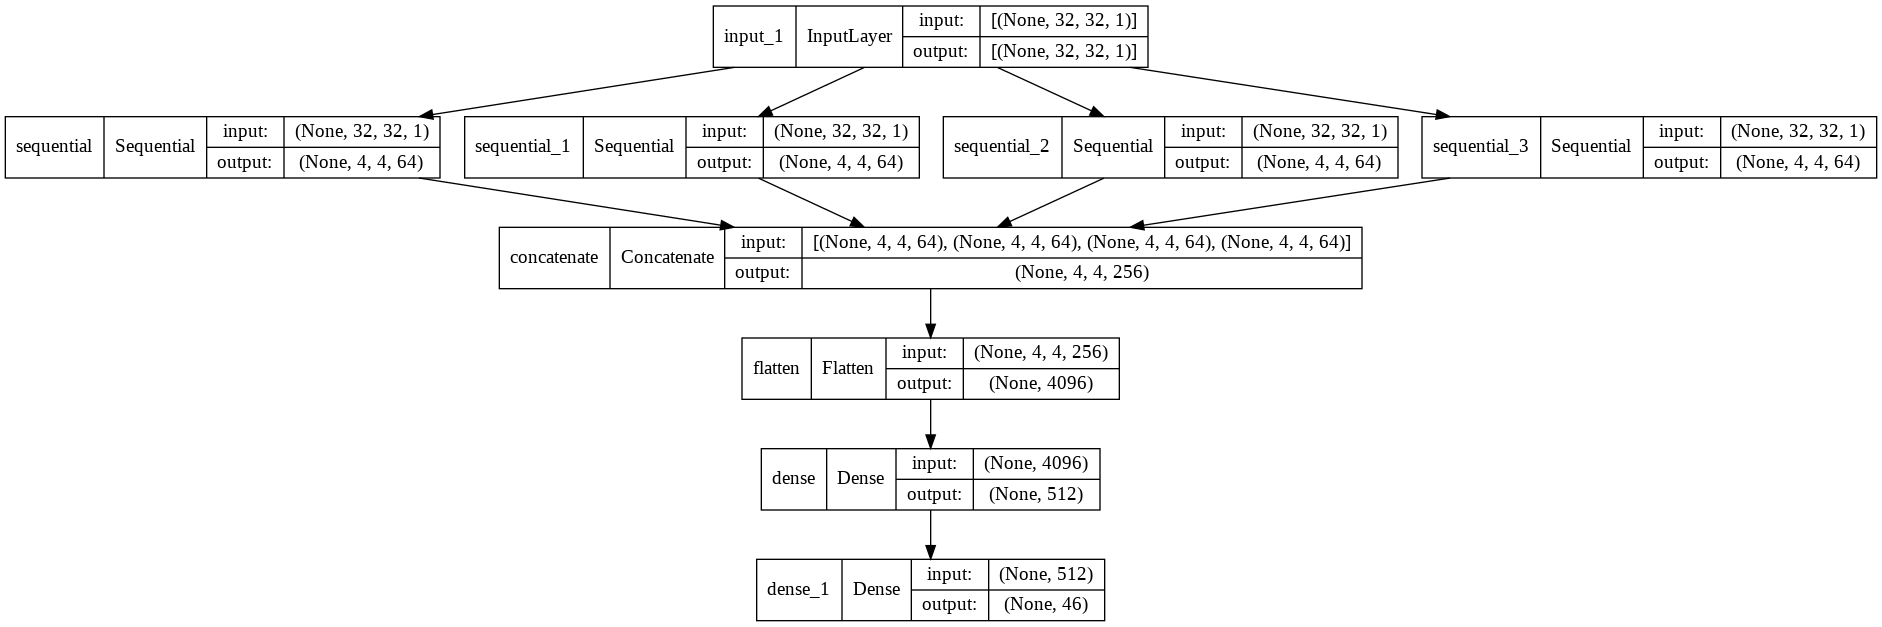

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(final, to_file='stacked_model_plot.png',show_shapes=True, show_layer_names=True)

In [18]:
final.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/25
1953/1955 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.8380
Epoch 00001: val_accuracy improved from -inf to 0.83683, saving model to phase4_model.h5
1955/1955 [==============================] - 52s 21ms/step - loss: 0.5611 - accuracy: 0.8381 - val_loss: 0.5823 - val_accuracy: 0.8368
Epoch 2/25
1954/1955 [============================>.] - ETA: 0s - loss: 0.1419 - accuracy: 0.9551
Epoch 00002: val_accuracy improved from 0.83683 to 0.88114, saving model to phase4_model.h5
1955/1955 [==============================] - 40s 20ms/step - loss: 0.1419 - accuracy: 0.9551 - val_loss: 0.4200 - val_accuracy: 0.8811
Epoch 3/25
1952/1955 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9682
Epoch 00003: val_accuracy improved from 0.88114 to 0.89974, saving model to phase4_model.h5
1955/1955 [==============================] - 40s 20ms/step - loss: 0.1011 - accuracy: 0.9682 - val_loss: 0.3893 - val_accuracy: 0.8997
Epoch 4/25
1952/1955 [======

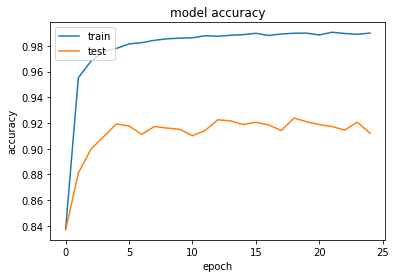

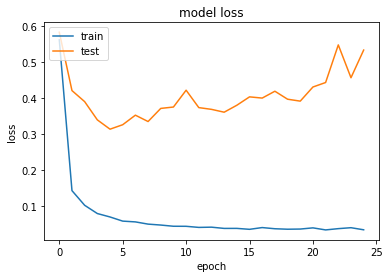

In [19]:
checkpoint = ModelCheckpoint("phase4_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

final_history = final.fit(train,epochs=25,batch_size =64,validation_data = validation,callbacks=[checkpoint,early])

plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()